In [1]:
%pip install -U seaborn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [2]:
%pip uninstall botocore -y
%pip install -q 'botocore==1.22.5'



/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Found existing installation: botocore 1.22.5
Uninstalling botocore-1.22.5:
  Successfully uninstalled botocore-1.22.5
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes


In [3]:
#import the libraries that we will use
import s3fs
import sagemaker
import pandas as pd

In [4]:
#Now that it is there, in the future you can 
df = pd.read_csv('Data.csv')
df

,BEGIN_DATE,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover,conditions,description,Sum_Crashes,Sum_Fatalities,text
0,1/1/2016,3.5,19.8,0.00,0.0,7.06,40.3,9.1,0.9%,Clear,Clear conditions throughout the day.,1,1,Clear conditions throughout the day.
1,1/2/2016,4.6,23.5,0.00,0.0,7.02,33.3,7.7,62.3%,Partially cloudy,Partly cloudy throughout the day.,2,2,Partly cloudy throughout the day.
2,1/3/2016,19.1,26.2,0.00,0.0,6.73,34.4,5.8,83.4%,Partially cloudy,Partly cloudy throughout the day.,3,3,Partly cloudy throughout the day.
3,1/4/2016,18.2,30.0,0.00,0.0,6.48,28.9,7.9,82.3%,Partially cloudy,Partly cloudy throughout the day.,4,4,Partly cloudy throughout the day.
4,1/5/2016,27.3,38.4,0.01,0.0,6.03,NaN,14.1,93.0%,"Snow, Overcast",Cloudy skies throughout the day with morning r...,5,5,Cloudy skies throughout the day with morning r...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,4/9/2022,39.5,66.2,0.00,0.0,24.20,29.8,20.6,64.0%,Partially cloudy,Partly cloudy throughout the day.,2291,2291,Partly cloudy throughout the day.
2291,4/10/2022,35.4,48.4,0.00,0.9,10.50,27.7,18.3,63.7%,Partially cloudy,Partly cloudy throughout the day.,2292,2292,Partly cloudy throughout the day.
2292,4/11/2022,32.9,61.6,0.31,3.0,1.50,40.3,24.2,90.1%,"Snow, Rain, Overcast",Cloudy skies throughout the day with late afte...,2293,2293,Cloudy skies throughout the day with late afte...
2293,4/12/2022,30.5,37.0,0.03,3.2,3.10,33.3,22.5,91.4%,"Snow, Overcast",Cloudy skies throughout the day with snow.,2294,2294,Cloudy skies throughout the day with snow.


In [5]:
df.head()

,BEGIN_DATE,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,cloudcover,conditions,description,Sum_Crashes,Sum_Fatalities,text
0,1/1/2016,3.5,19.8,0.00,0.0,7.06,40.3,9.1,0.9%,Clear,Clear conditions throughout the day.,1,1,Clear conditions throughout the day.
1,1/2/2016,4.6,23.5,0.00,0.0,7.02,33.3,7.7,62.3%,Partially cloudy,Partly cloudy throughout the day.,2,2,Partly cloudy throughout the day.
2,1/3/2016,19.1,26.2,0.00,0.0,6.73,34.4,5.8,83.4%,Partially cloudy,Partly cloudy throughout the day.,3,3,Partly cloudy throughout the day.
3,1/4/2016,18.2,30.0,0.00,0.0,6.48,28.9,7.9,82.3%,Partially cloudy,Partly cloudy throughout the day.,4,4,Partly cloudy throughout the day.
4,1/5/2016,27.3,38.4,0.01,0.0,6.03,NaN,14.1,93.0%,"Snow, Overcast",Cloudy skies throughout the day with morning r...,5,5,Cloudy skies throughout the day with morning r...


In [6]:
df.describe()

,Low,High,Precipitation,snow,snowdepth,windgust,windspeed,Sum_Crashes,Sum_Fatalities
count,2295.000000,2295.000000,2295.000000,2295.000000,2295.000000,1601.000000,2295.000000,2295.000000,2295.000000
mean,45.250719,64.378780,0.037821,0.476693,3.816519,28.512055,15.248192,1148.000000,1148.000000
std,17.048288,21.170824,0.115214,1.690571,8.792857,8.338361,5.761037,662.653756,662.653756
min,-4.000000,14.900000,0.000000,0.000000,0.000000,5.100000,4.900000,1.000000,1.000000
25%,30.900000,46.700000,0.000000,0.000000,0.000000,23.000000,10.700000,574.500000,574.500000
50%,43.300000,62.400000,0.000000,0.000000,0.000000,27.700000,13.900000,1148.000000,1148.000000
75%,60.050000,83.700000,0.000000,0.000000,2.850000,33.300000,18.800000,1721.500000,1721.500000
max,82.700000,104.900000,2.040000,23.140000,51.150000,68.000000,41.300000,2295.000000,2295.000000


In [7]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Low               0.192523
High              0.078372
Precipitation     5.516095
snow              7.323018
snowdepth         2.930322
windgust          0.385823
windspeed         0.922711
Sum_Crashes       0.000000
Sum_Fatalities    0.000000
dtype: float64

In [8]:
df['snowRecip'] = 1/(df['snow']+.01) 
df['snowRT'] =df['snow']**(1/10)
df['snowSQRT'] =df['snow']**(1/2)
import numpy as np
df['snowNLog'] = np.log(df['snow']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Low               0.192523
High              0.078372
Precipitation     5.516095
snow              7.323018
snowdepth         2.930322
windgust          0.385823
windspeed         0.922711
Sum_Crashes       0.000000
Sum_Fatalities    0.000000
snowRecip        -1.238812
snowRT            1.296963
snowSQRT          2.878037
snowNLog          1.506451
dtype: float64

In [10]:
df.drop('snowNLog', axis=1, inplace = True)
df.drop('snow', axis=1, inplace = True)
df.drop('snowSQRT', axis=1, inplace = True)
df.drop('snowRT', axis=1, inplace = True)

In [11]:
df['PrecipitationRecip'] = 1/(df['Precipitation']+.01) 
df['PrecipitationRT'] =df['Precipitation']**(1/10)
df['PrecipitationSQRT'] =df['Precipitation']**(1/2)
import numpy as np
df['PrecipitationNLog'] = np.log(df['Precipitation']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Low                   0.192523
High                  0.078372
Precipitation         5.516095
snowdepth             2.930322
windgust              0.385823
windspeed             0.922711
Sum_Crashes           0.000000
Sum_Fatalities        0.000000
snowRecip            -1.238812
PrecipitationRecip   -1.334821
PrecipitationRT       1.250744
PrecipitationSQRT     2.481268
PrecipitationNLog     1.931230
dtype: float64

In [12]:
df.drop('Precipitation', axis=1, inplace = True)
df.drop('PrecipitationRecip', axis=1, inplace = True)
df.drop('PrecipitationSQRT', axis=1, inplace = True)
df.drop('PrecipitationNLog', axis=1, inplace = True)

In [13]:
df['snowdepthRecip'] = 1/(df['snowdepth']+.01) 
df['snowdepthRT'] =df['snowdepth']**(1/3)
df['snowdepthSQRT'] =df['snowdepth']**(1/2)
import numpy as np
df['snowdepthNLog'] = np.log(df['snowdepth']+.01)
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Low                0.192523
High               0.078372
snowdepth          2.930322
windgust           0.385823
windspeed          0.922711
Sum_Crashes        0.000000
Sum_Fatalities     0.000000
snowRecip         -1.238812
PrecipitationRT    1.250744
snowdepthRecip    -0.547419
snowdepthRT        1.232870
snowdepthSQRT      1.750370
snowdepthNLog      0.744486
dtype: float64

In [14]:
df.drop('snowdepth', axis=1, inplace = True)
df.drop('snowdepthRT', axis=1, inplace = True)
df.drop('snowdepthSQRT', axis=1, inplace = True)
df.drop('snowdepthNLog', axis=1, inplace = True)

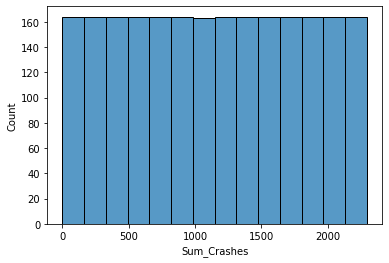

In [15]:
import seaborn as sns
sns.histplot(df['Sum_Crashes']);

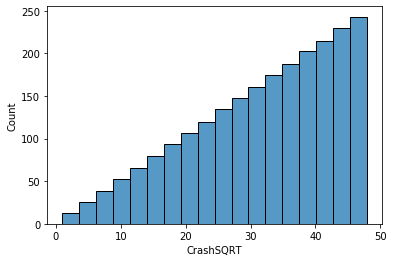

In [16]:
df['CrashSQRT'] =df['Sum_Crashes']**(1/2)
sns.histplot(df['CrashSQRT']);

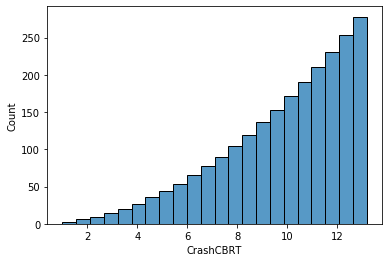

In [17]:
df['CrashCBRT'] =df['Sum_Crashes']**(1/3)
sns.histplot(df['CrashCBRT']);

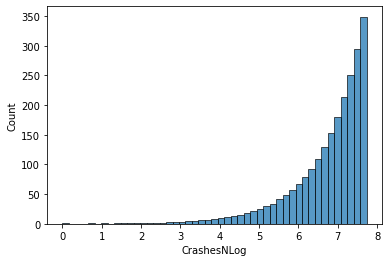

In [18]:
import numpy as np
df['CrashesNLog'] = np.log(df['Sum_Crashes'])
sns.histplot(df['CrashesNLog']);

In [19]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Low                0.192523
High               0.078372
windgust           0.385823
windspeed          0.922711
Sum_Crashes        0.000000
Sum_Fatalities     0.000000
snowRecip         -1.238812
PrecipitationRT    1.250744
snowdepthRecip    -0.547419
CrashSQRT         -0.564512
CrashCBRT         -0.856605
CrashesNLog       -1.911208
dtype: float64

In [20]:
df.head()

,BEGIN_DATE,Low,High,windgust,windspeed,cloudcover,conditions,description,Sum_Crashes,Sum_Fatalities,text,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
0,1/1/2016,3.5,19.8,40.3,9.1,0.9%,Clear,Clear conditions throughout the day.,1,1,Clear conditions throughout the day.,100.0,0.000000,0.141443,1.000000,1.000000,0.000000
1,1/2/2016,4.6,23.5,33.3,7.7,62.3%,Partially cloudy,Partly cloudy throughout the day.,2,2,Partly cloudy throughout the day.,100.0,0.000000,0.142248,1.414214,1.259921,0.693147
2,1/3/2016,19.1,26.2,34.4,5.8,83.4%,Partially cloudy,Partly cloudy throughout the day.,3,3,Partly cloudy throughout the day.,100.0,0.000000,0.148368,1.732051,1.442250,1.098612
3,1/4/2016,18.2,30.0,28.9,7.9,82.3%,Partially cloudy,Partly cloudy throughout the day.,4,4,Partly cloudy throughout the day.,100.0,0.000000,0.154083,2.000000,1.587401,1.386294
4,1/5/2016,27.3,38.4,NaN,14.1,93.0%,"Snow, Overcast",Cloudy skies throughout the day with morning r...,5,5,Cloudy skies throughout the day with morning r...,100.0,0.630957,0.165563,2.236068,1.709976,1.609438


In [21]:
 df.corr()

,Low,High,windgust,windspeed,Sum_Crashes,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
Low,1.000000,0.958381,0.091305,0.263609,-0.065253,-0.065253,0.466201,-0.174354,0.657838,-0.039533,-0.024588,0.021369
High,0.958381,1.000000,0.063433,0.213800,-0.042825,-0.042825,0.496678,-0.266442,0.677403,-0.020304,-0.006531,0.036956
windgust,0.091305,0.063433,1.000000,0.688773,-0.156075,-0.156075,-0.058316,0.254367,0.016395,-0.154405,-0.153206,-0.148031
windspeed,0.263609,0.213800,0.688773,1.000000,-0.052365,-0.052365,-0.041501,0.268012,0.077835,-0.048059,-0.042722,-0.020272
Sum_Crashes,-0.065253,-0.042825,-0.156075,-0.052365,1.000000,1.000000,-0.240467,-0.053617,-0.243026,0.979895,0.958645,0.870133
Sum_Fatalities,-0.065253,-0.042825,-0.156075,-0.052365,1.000000,1.000000,-0.240467,-0.053617,-0.243026,0.979895,0.958645,0.870133
snowRecip,0.466201,0.496678,-0.058316,-0.041501,-0.240467,-0.240467,1.000000,-0.322651,0.733899,-0.203852,-0.186152,-0.137739
PrecipitationRT,-0.174354,-0.266442,0.254367,0.268012,-0.053617,-0.053617,-0.322651,1.000000,-0.211934,-0.058047,-0.059723,-0.061820
snowdepthRecip,0.657838,0.677403,0.016395,0.077835,-0.243026,-0.243026,0.733899,-0.211934,1.000000,-0.196568,-0.172494,-0.102448
CrashSQRT,-0.039533,-0.020304,-0.154405,-0.048059,0.979895,0.979895,-0.203852,-0.058047,-0.196568,1.000000,0.995931,0.946066


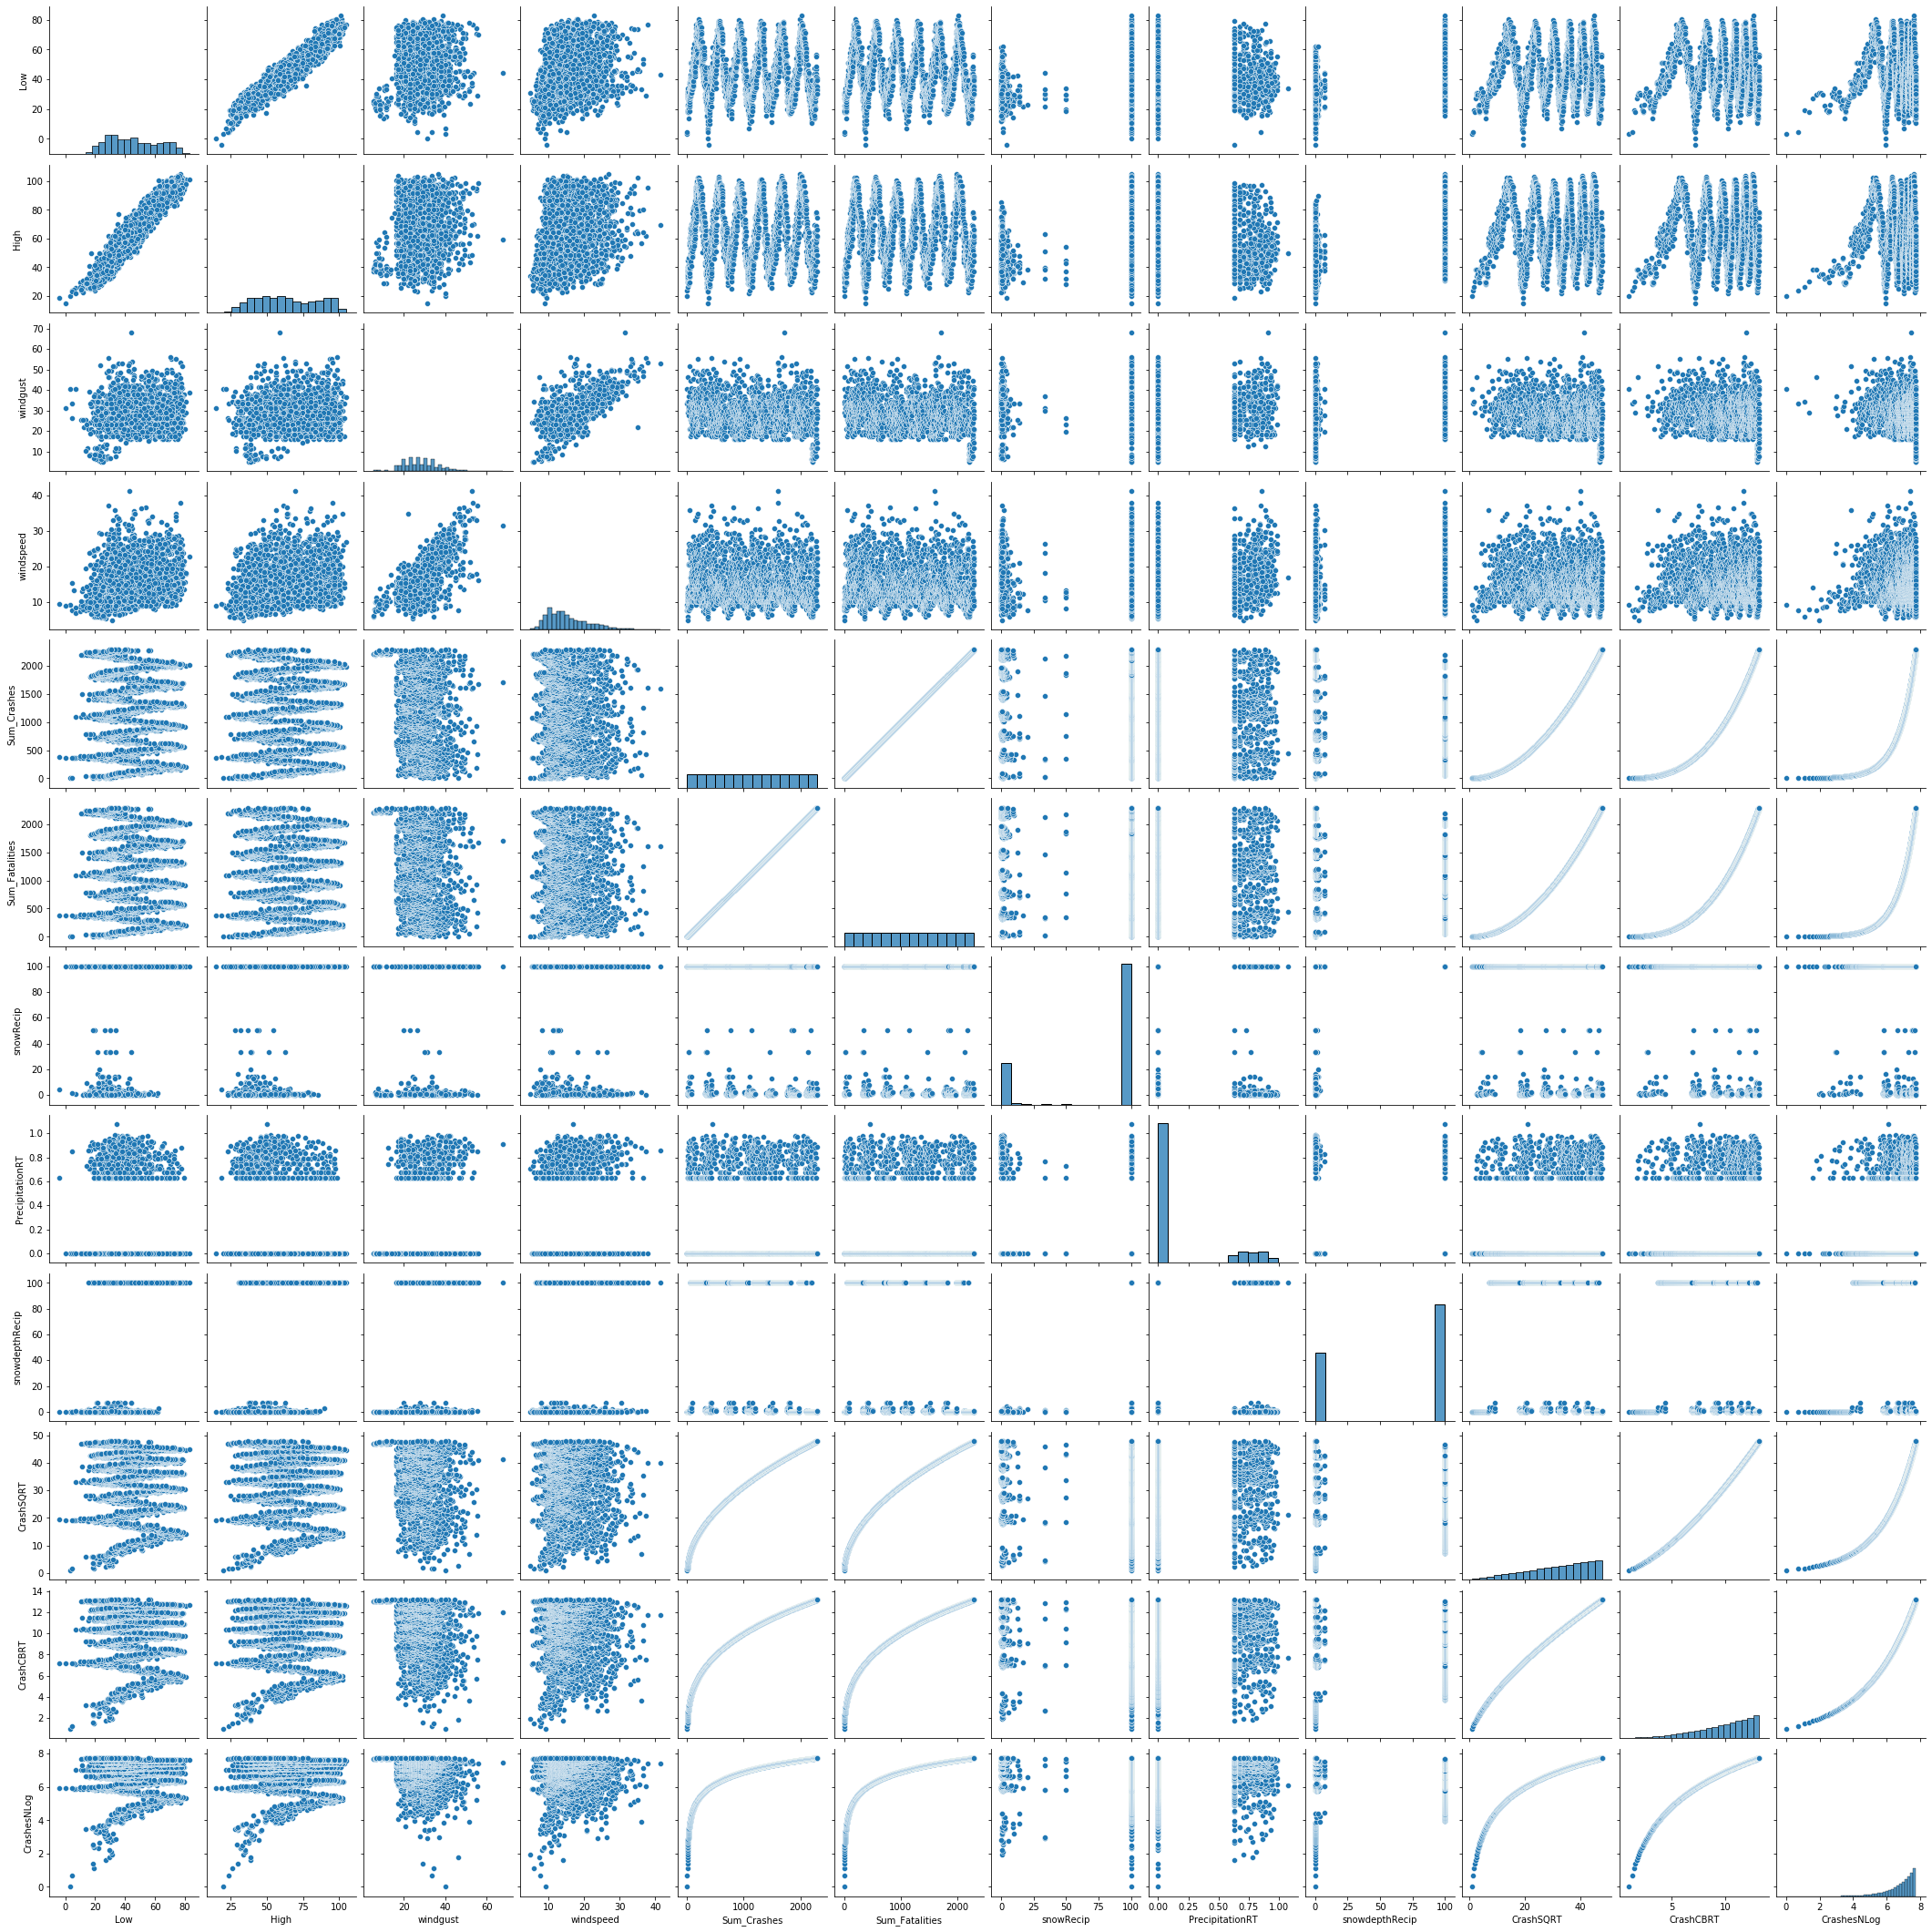

In [22]:
import seaborn as sns
sns.pairplot(df);

In [38]:
df['windgust'] = df['windgust'].fillna(0)

In [39]:
df_dummies=df.copy()

for col in df:
  if not pd.api.types.is_numeric_dtype(df[col]):
    df_dummies=pd.get_dummies(df_dummies, columns=[col], drop_first=True)

df_dummies.head()


,Low,High,windgust,windspeed,Sum_Crashes,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,...,text_Partly cloudy throughout the day with morning snow.,text_Partly cloudy throughout the day with rain clearing later.,text_Partly cloudy throughout the day with rain in the morning and afternoon.,text_Partly cloudy throughout the day with rain or snow clearing later.,text_Partly cloudy throughout the day with rain or snow.,text_Partly cloudy throughout the day with rain.,text_Partly cloudy throughout the day with snow clearing later.,text_Partly cloudy throughout the day with snow in the morning and afternoon.,text_Partly cloudy throughout the day with snow.,text_Partly cloudy throughout the day.
0,3.5,19.8,40.3,9.1,1,1,100.0,0.000000,0.141443,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,4.6,23.5,33.3,7.7,2,2,100.0,0.000000,0.142248,1.414214,...,0,0,0,0,0,0,0,0,0,1
2,19.1,26.2,34.4,5.8,3,3,100.0,0.000000,0.148368,1.732051,...,0,0,0,0,0,0,0,0,0,1
3,18.2,30.0,28.9,7.9,4,4,100.0,0.000000,0.154083,2.000000,...,0,0,0,0,0,0,0,0,0,1
4,27.3,38.4,0.0,14.1,5,5,100.0,0.630957,0.165563,2.236068,...,0,0,0,0,0,0,0,0,0,0


In [40]:
df_dummies

,Low,High,windgust,windspeed,Sum_Crashes,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,...,text_Partly cloudy throughout the day with morning snow.,text_Partly cloudy throughout the day with rain clearing later.,text_Partly cloudy throughout the day with rain in the morning and afternoon.,text_Partly cloudy throughout the day with rain or snow clearing later.,text_Partly cloudy throughout the day with rain or snow.,text_Partly cloudy throughout the day with rain.,text_Partly cloudy throughout the day with snow clearing later.,text_Partly cloudy throughout the day with snow in the morning and afternoon.,text_Partly cloudy throughout the day with snow.,text_Partly cloudy throughout the day.
0,3.5,19.8,40.3,9.1,1,1,100.000000,0.000000,0.141443,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,4.6,23.5,33.3,7.7,2,2,100.000000,0.000000,0.142248,1.414214,...,0,0,0,0,0,0,0,0,0,1
2,19.1,26.2,34.4,5.8,3,3,100.000000,0.000000,0.148368,1.732051,...,0,0,0,0,0,0,0,0,0,1
3,18.2,30.0,28.9,7.9,4,4,100.000000,0.000000,0.154083,2.000000,...,0,0,0,0,0,0,0,0,0,1
4,27.3,38.4,0.0,14.1,5,5,100.000000,0.630957,0.165563,2.236068,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,39.5,66.2,29.8,20.6,2291,2291,100.000000,0.000000,0.041305,47.864392,...,0,0,0,0,0,0,0,0,0,1
2291,35.4,48.4,27.7,18.3,2292,2292,1.098901,0.000000,0.095147,47.874837,...,0,0,0,0,0,0,0,0,0,1
2292,32.9,61.6,40.3,24.2,2293,2293,0.332226,0.889480,0.662252,47.885280,...,0,0,0,0,0,0,0,0,0,0
2293,30.5,37.0,33.3,22.5,2294,2294,0.311526,0.704226,0.321543,47.895720,...,0,0,0,0,0,0,0,0,0,0


In [41]:
%pip install --upgrade numpy
%pip install --upgrade pandas

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.
/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [42]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor # Import Decision Tree Regression algorithm
from sklearn.ensemble import GradientBoostingRegressor # Import XGBoost algorithm 
from sklearn.model_selection import train_test_split

In [43]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Low                0.192523
High               0.078372
windgust          -0.160375
windspeed          0.922711
Sum_Crashes        0.000000
Sum_Fatalities     0.000000
snowRecip         -1.238812
PrecipitationRT    1.250744
snowdepthRecip    -0.547419
CrashSQRT         -0.564512
CrashCBRT         -0.856605
CrashesNLog       -1.911208
dtype: float64

In [44]:
y = df.Sum_Crashes # Label
X = df.drop(columns=['Sum_Crashes']) # Features
X = X.select_dtypes(np.number)
X.head()

,Low,High,windgust,windspeed,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
0,3.5,19.8,40.3,9.1,1,100.0,0.000000,0.141443,1.000000,1.000000,0.000000
1,4.6,23.5,33.3,7.7,2,100.0,0.000000,0.142248,1.414214,1.259921,0.693147
2,19.1,26.2,34.4,5.8,3,100.0,0.000000,0.148368,1.732051,1.442250,1.098612
3,18.2,30.0,28.9,7.9,4,100.0,0.000000,0.154083,2.000000,1.587401,1.386294
4,27.3,38.4,0.0,14.1,5,100.0,0.630957,0.165563,2.236068,1.709976,1.609438


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test
X_train.head()

,Low,High,windgust,windspeed,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,CrashesNLog
1645,68.9,94.6,28.6,19.2,1646,100.0,0.0,100.00000,40.570926,11.807101,7.406103
662,41.6,62.4,0.0,9.9,663,100.0,0.0,100.00000,25.748786,8.719760,6.496775
845,48.2,72.7,27.7,12.5,846,100.0,0.0,100.00000,29.086079,9.457800,6.740519
1962,57.6,77.8,36.7,21.7,1963,100.0,0.0,0.07215,44.305756,12.521031,7.582229
248,53.5,73.4,21.9,15.6,249,100.0,0.0,100.00000,15.779734,6.291195,5.517453


In [46]:
df.columns[df.isna().any()]

Index([], dtype='object')

In [47]:
clf = DecisionTreeRegressor()

In [48]:
clf = clf.fit(X_train,y_train)

In [49]:
y_pred = clf.predict(X_test)

In [50]:
df_dummies

,Low,High,windgust,windspeed,Sum_Crashes,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,...,text_Partly cloudy throughout the day with morning snow.,text_Partly cloudy throughout the day with rain clearing later.,text_Partly cloudy throughout the day with rain in the morning and afternoon.,text_Partly cloudy throughout the day with rain or snow clearing later.,text_Partly cloudy throughout the day with rain or snow.,text_Partly cloudy throughout the day with rain.,text_Partly cloudy throughout the day with snow clearing later.,text_Partly cloudy throughout the day with snow in the morning and afternoon.,text_Partly cloudy throughout the day with snow.,text_Partly cloudy throughout the day.
0,3.5,19.8,40.3,9.1,1,1,100.000000,0.000000,0.141443,1.000000,...,0,0,0,0,0,0,0,0,0,0
1,4.6,23.5,33.3,7.7,2,2,100.000000,0.000000,0.142248,1.414214,...,0,0,0,0,0,0,0,0,0,1
2,19.1,26.2,34.4,5.8,3,3,100.000000,0.000000,0.148368,1.732051,...,0,0,0,0,0,0,0,0,0,1
3,18.2,30.0,28.9,7.9,4,4,100.000000,0.000000,0.154083,2.000000,...,0,0,0,0,0,0,0,0,0,1
4,27.3,38.4,0.0,14.1,5,5,100.000000,0.630957,0.165563,2.236068,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2290,39.5,66.2,29.8,20.6,2291,2291,100.000000,0.000000,0.041305,47.864392,...,0,0,0,0,0,0,0,0,0,1
2291,35.4,48.4,27.7,18.3,2292,2292,1.098901,0.000000,0.095147,47.874837,...,0,0,0,0,0,0,0,0,0,1
2292,32.9,61.6,40.3,24.2,2293,2293,0.332226,0.889480,0.662252,47.885280,...,0,0,0,0,0,0,0,0,0,0
2293,30.5,37.0,33.3,22.5,2294,2294,0.311526,0.704226,0.321543,47.895720,...,0,0,0,0,0,0,0,0,0,0


In [51]:
import statsmodels.api as sm
y = df_dummies['Sum_Crashes']

In [52]:
X = df_dummies.drop(columns=['Sum_Crashes'])

In [53]:
X['const'] = 1 ## allows you to get the y intercept , quirk of the stats package 

In [54]:
model = sm.OLS(y, X).fit()
print(model.summary())

/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1749: RuntimeWarning: divide by zero encountered in true_divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1750: RuntimeWarning: invalid value encountered in double_scalars
  * (1 - self.rsquared))
/opt/conda/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1671: RuntimeWarning: divide by zero encountered in double_scalars
  return np.dot(wresid, wresid) / self.df_resid


                            OLS Regression Results                            
Dep. Variable:            Sum_Crashes   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Thu, 14 Apr 2022   Prob (F-statistic):                nan
Time:                        04:08:03   Log-Likelihood:                 57347.
No. Observations:                2295   AIC:                        -1.101e+05
Df Residuals:                       0   BIC:                        -9.693e+04
Df Model:                        2294                                         
Covariance Type:            nonrobust                                         
                                                                                             coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

In [55]:
%pip install -U sklearn

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
Note: you may need to restart the kernel to use updated packages.


In [56]:
from sklearn.model_selection import train_test_split
X.drop(columns=['const'], inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
X_train.head()

,Low,High,windgust,windspeed,Sum_Fatalities,snowRecip,PrecipitationRT,snowdepthRecip,CrashSQRT,CrashCBRT,...,text_Partly cloudy throughout the day with morning snow.,text_Partly cloudy throughout the day with rain clearing later.,text_Partly cloudy throughout the day with rain in the morning and afternoon.,text_Partly cloudy throughout the day with rain or snow clearing later.,text_Partly cloudy throughout the day with rain or snow.,text_Partly cloudy throughout the day with rain.,text_Partly cloudy throughout the day with snow clearing later.,text_Partly cloudy throughout the day with snow in the morning and afternoon.,text_Partly cloudy throughout the day with snow.,text_Partly cloudy throughout the day.
1037,38.1,51.8,18.3,12.8,1038,100.000000,0.0,100.000000,32.218007,10.125095,...,0,0,0,0,0,0,0,0,0,0
792,31.8,46.1,0.0,13.7,793,0.326797,0.0,0.259067,28.160256,9.256022,...,0,0,0,0,0,0,0,0,0,1
662,41.6,62.4,0.0,9.9,663,100.000000,0.0,100.000000,25.748786,8.719760,...,0,0,0,0,0,0,0,0,0,0
927,73.0,96.8,33.3,16.8,928,100.000000,0.0,100.000000,30.463092,9.753998,...,0,0,0,0,0,0,0,0,0,1
1432,29.8,39.4,0.0,7.8,1433,100.000000,0.0,0.277008,37.854986,11.274105,...,0,0,0,0,0,0,0,0,0,1


In [57]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
dtr = DecisionTreeRegressor(random_state=12345).fit(X_train,y_train)

In [59]:
dtr.score(X_test, y_test)

0.9999858723086168

In [60]:
df_predict = pd.DataFrame({'Actual':y_test, 'Predicted':dtr.predict(X_test)})
df_predict.head()

,Actual,Predicted
172,173,174.0
521,522,521.0
836,837,840.0
2278,2279,2280.0
413,414,416.0


In [61]:
np.exp(df_predict)

,Actual,Predicted
172,1.358143e+75,3.691814e+75
521,5.031756e+226,1.851080e+226
836,inf,inf
2278,inf,inf
413,6.279362e+179,4.639856e+180
...,...,...
738,inf,inf
1647,inf,inf
1202,inf,inf
453,1.478069e+197,1.092154e+198


In [ ]:
import joblib #to publish model
joblib.dump(dtr, 'trained_moedl.sav')